In [1]:
library(plyr)
library(ggplot2)
library(class)





In [4]:
# iris 데이터의 갯수를 2개만 
iris_data <- iris[,c("Sepal.Length","Sepal.Width","Species")]
head(iris_data)





Sepal.Length,Sepal.Width,Species
5.1,3.5,setosa
4.9,3.0,setosa
4.7,3.2,setosa
4.6,3.1,setosa
5.0,3.6,setosa
5.4,3.9,setosa


In [5]:
set.seed(1234) # 샘플값 고정
samp <- c(sample(1:50, 35), sample(51:100, 35),sample(101:150, 35))





In [8]:
# 학습용 검증용 데이터 분류
#문제
# 학습용 데이터
data.train <- iris_data[samp, -3]
# 검증용 데이터
data.test <- iris_data[-samp, -3]

# 답
# 학습용 데이터
data.train.y <- iris_data[samp, 3]
# 검증용 데이터
data.test.y <- iris_data[-samp, 3]









In [11]:
# 학습용 검증용 확인
dim(data.train)
dim(data.test)





[1] 105   2

[1] 45  2

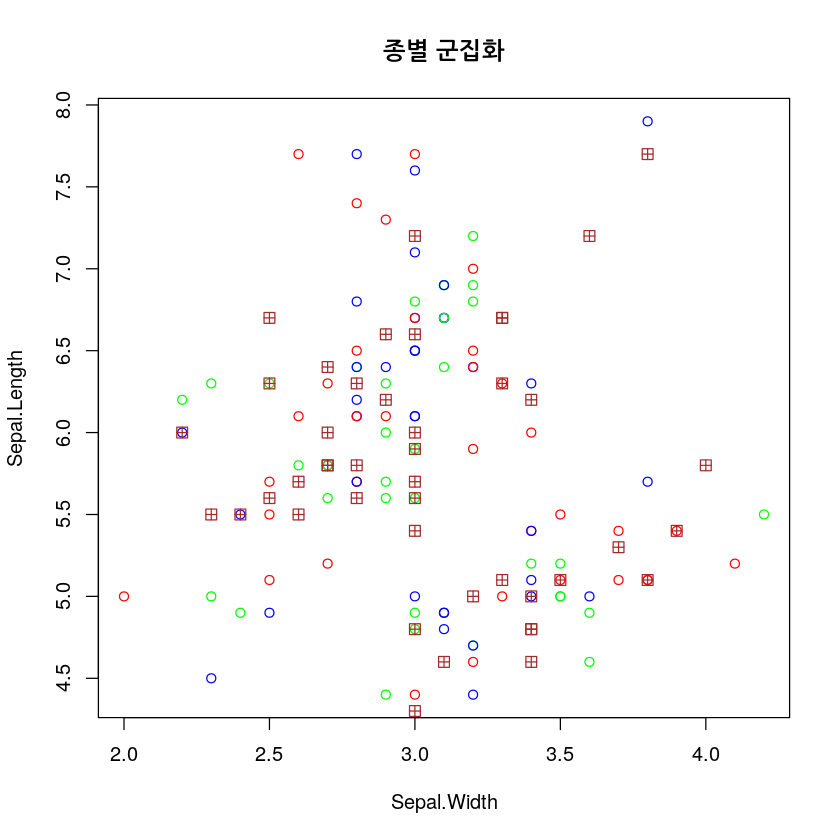

In [16]:
# 학습용 데이터셋의 산점도 그리기
plot(Sepal.Length ~ Sepal.Width, data = data.train,
     col = c("red","blue","green"),
     main = "종별 군집화")

# 검증용 데이터 표시하기
points(Sepal.Length ~ Sepal.Width, data = data.test,
      pch = 12, cex = 1.2, col="brown")









## K의 값을 찾는 것이 중요하다!!!!

In [18]:
# k 의 값을 찾자
# 분류 정확도를 저장할 비어 있는 벡터 생성 - k 가 1부터 105 까지 정확도를 다 저장 할 것
accuracy_k <- NULL

# k값을 1 에서 105 까지 증가시켜 가면서 최적의 K 값을 찾는다.
for(i in c(1:nrow(data.train))){
    set.seed(1234)
    knn_k = knn(train = data.train, test = data.test, cl = data.train.y, k = i) # 훈련용 테스트용 정답 k 값 순으로 지정 i 값을 k에 적용
    accuracy_k = c(accuracy_k, mean(data.test.y == knn_k))
}













In [21]:
df_accuracy <- data.frame(k = c(1:nrow(data.train)), accuracy = accuracy_k)
head(df_accuracy)





k,accuracy
1,0.7333333
2,0.7111111
3,0.7555556
4,0.8000000
5,0.8000000
6,0.8000000


In [28]:
library(doBy)





In [39]:
head(orderBy(~ -accuracy + k, df_accuracy), 8)





,k,accuracy
4,4,0.8000000
5,5,0.8000000
6,6,0.8000000
7,7,0.8000000
8,8,0.8000000
12,12,0.8000000
9,9,0.7777778
13,13,0.7777778


In [54]:
# knn model
set.seed(1234)
knn = knn(train = data.train, test = data.test, cl = data.train.y, k = 4)

df <- data.frame(data.test.y, predicted = knn )
head(df)

table(data.test.y, knn)

round(mean(knn == data.test.y) * 100, 2)









data.test.y,predicted
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa


            knn
data.test.y  setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         3
  virginica       0          6         9

[1] 80

# 한 칸에서 진행하기

In [55]:
head(iris)





Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [59]:
# iris 데이터의 갯수를 2개만 
iris_data <- iris[,c("Sepal.Length","Sepal.Width","Species")]


set.seed(1234) # 샘플값 고정
samp <- c(sample(1:50, 35), sample(51:100, 35),sample(101:150, 35))


# 학습용 검증용 데이터 분류
#문제
# 학습용 데이터
data.train <- iris_data[samp, -3]
# 검증용 데이터
data.test <- iris_data[-samp, -3]

# 답
# 학습용 데이터
data.train.y <- iris_data[samp, 3]
# 검증용 데이터
data.test.y <- iris_data[-samp, 3]

# k 의 값을 찾자
# 분류 정확도를 저장할 비어 있는 벡터 생성 - k 가 1부터 105 까지 정확도를 다 저장 할 것
accuracy_k <- NULL

# k값을 1 에서 105 까지 증가시켜 가면서 최적의 K 값을 찾는다.
for(i in c(1:nrow(data.train))){
    set.seed(1234)
    knn_k = knn(train = data.train, test = data.test, cl = data.train.y, k = i) # 훈련용 테스트용 정답 k 값 순으로 지정 i 값을 k에 적용
    accuracy_k = c(accuracy_k, mean(data.test.y == knn_k))
}

df_accuracy <- data.frame(k = c(1:nrow(data.train)), accuracy = accuracy_k)
head(df_accuracy)


library(doBy)
head(orderBy(~ -accuracy + k, df_accuracy), 8)

# knn model
set.seed(1234)
knn = knn(train = data.train, test = data.test, cl = data.train.y, k = 4)

df <- data.frame(data.test.y, predicted = knn )
head(df)

table(data.test.y, knn)

paste("예측률 : ",round(mean(knn == data.test.y) * 100, 4))





















k,accuracy
1,0.7333333
2,0.7111111
3,0.7555556
4,0.8000000
5,0.8000000
6,0.8000000


,k,accuracy
4,4,0.8000000
5,5,0.8000000
6,6,0.8000000
7,7,0.8000000
8,8,0.8000000
12,12,0.8000000
9,9,0.7777778
13,13,0.7777778


data.test.y,predicted
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa


            knn
data.test.y  setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         3
  virginica       0          6         9

[1] "예측률 :  80"

# 모든 구성을 다 합해서 모델 구성하기

In [60]:
head(iris)





Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [63]:
set.seed(1234) # 샘플값 고정
samp <- c(sample(1:50, 35), sample(51:100, 35),sample(101:150, 35))


# 학습용 검증용 데이터 분류
#문제
# 학습용 데이터
data.train <- iris[samp, -5]
# 검증용 데이터
data.test <- iris[-samp, -5]

# 답
# 학습용 데이터
data.train.y <- iris[samp, 5]
# 검증용 데이터
data.test.y <- iris[-samp, 5]

# k 의 값을 찾자
# 분류 정확도를 저장할 비어 있는 벡터 생성 - k 가 1부터 105 까지 정확도를 다 저장 할 것
accuracy_k <- NULL

# k값을 1 에서 105 까지 증가시켜 가면서 최적의 K 값을 찾는다.
for(i in c(1:nrow(data.train))){
    set.seed(1234)
    knn_k = knn(train = data.train, test = data.test, cl = data.train.y, k = i) # 훈련용 테스트용 정답 k 값 순으로 지정 i 값을 k에 적용
    accuracy_k = c(accuracy_k, mean(data.test.y == knn_k))
}

df_accuracy <- data.frame(k = c(1:nrow(data.train)), accuracy = accuracy_k)
head(df_accuracy)


library(doBy)
head(orderBy(~ -accuracy + k, df_accuracy), 8)

# knn model
set.seed(1234)
knn = knn(train = data.train, test = data.test, cl = data.train.y, k = 5)

df <- data.frame(data.test.y, predicted = knn )
head(df)

table(data.test.y, knn)

paste("예측률 : ",round(mean(knn == data.test.y) * 100, 2))





















k,accuracy
1,0.9333333
2,0.9333333
3,0.9555556
4,0.9555556
5,0.9777778
6,0.9333333


,k,accuracy
5,5,0.9777778
3,3,0.9555556
4,4,0.9555556
7,7,0.9555556
8,8,0.9555556
9,9,0.9555556
10,10,0.9555556
1,1,0.9333333


data.test.y,predicted
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa


            knn
data.test.y  setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         1
  virginica       0          0        15

[1] "예측률 :  97.78"